# BUPA liver disorder dataset


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_bupa

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances 345 - Features 6 - Class 2
    0   1   2   3   4    5
0  85  92  45  27  31  0.0
1  85  64  59  32  23  0.0
2  86  54  33  16  54  0.0
3  91  78  34  24  36  0.0
4  87  70  12  28  10  0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


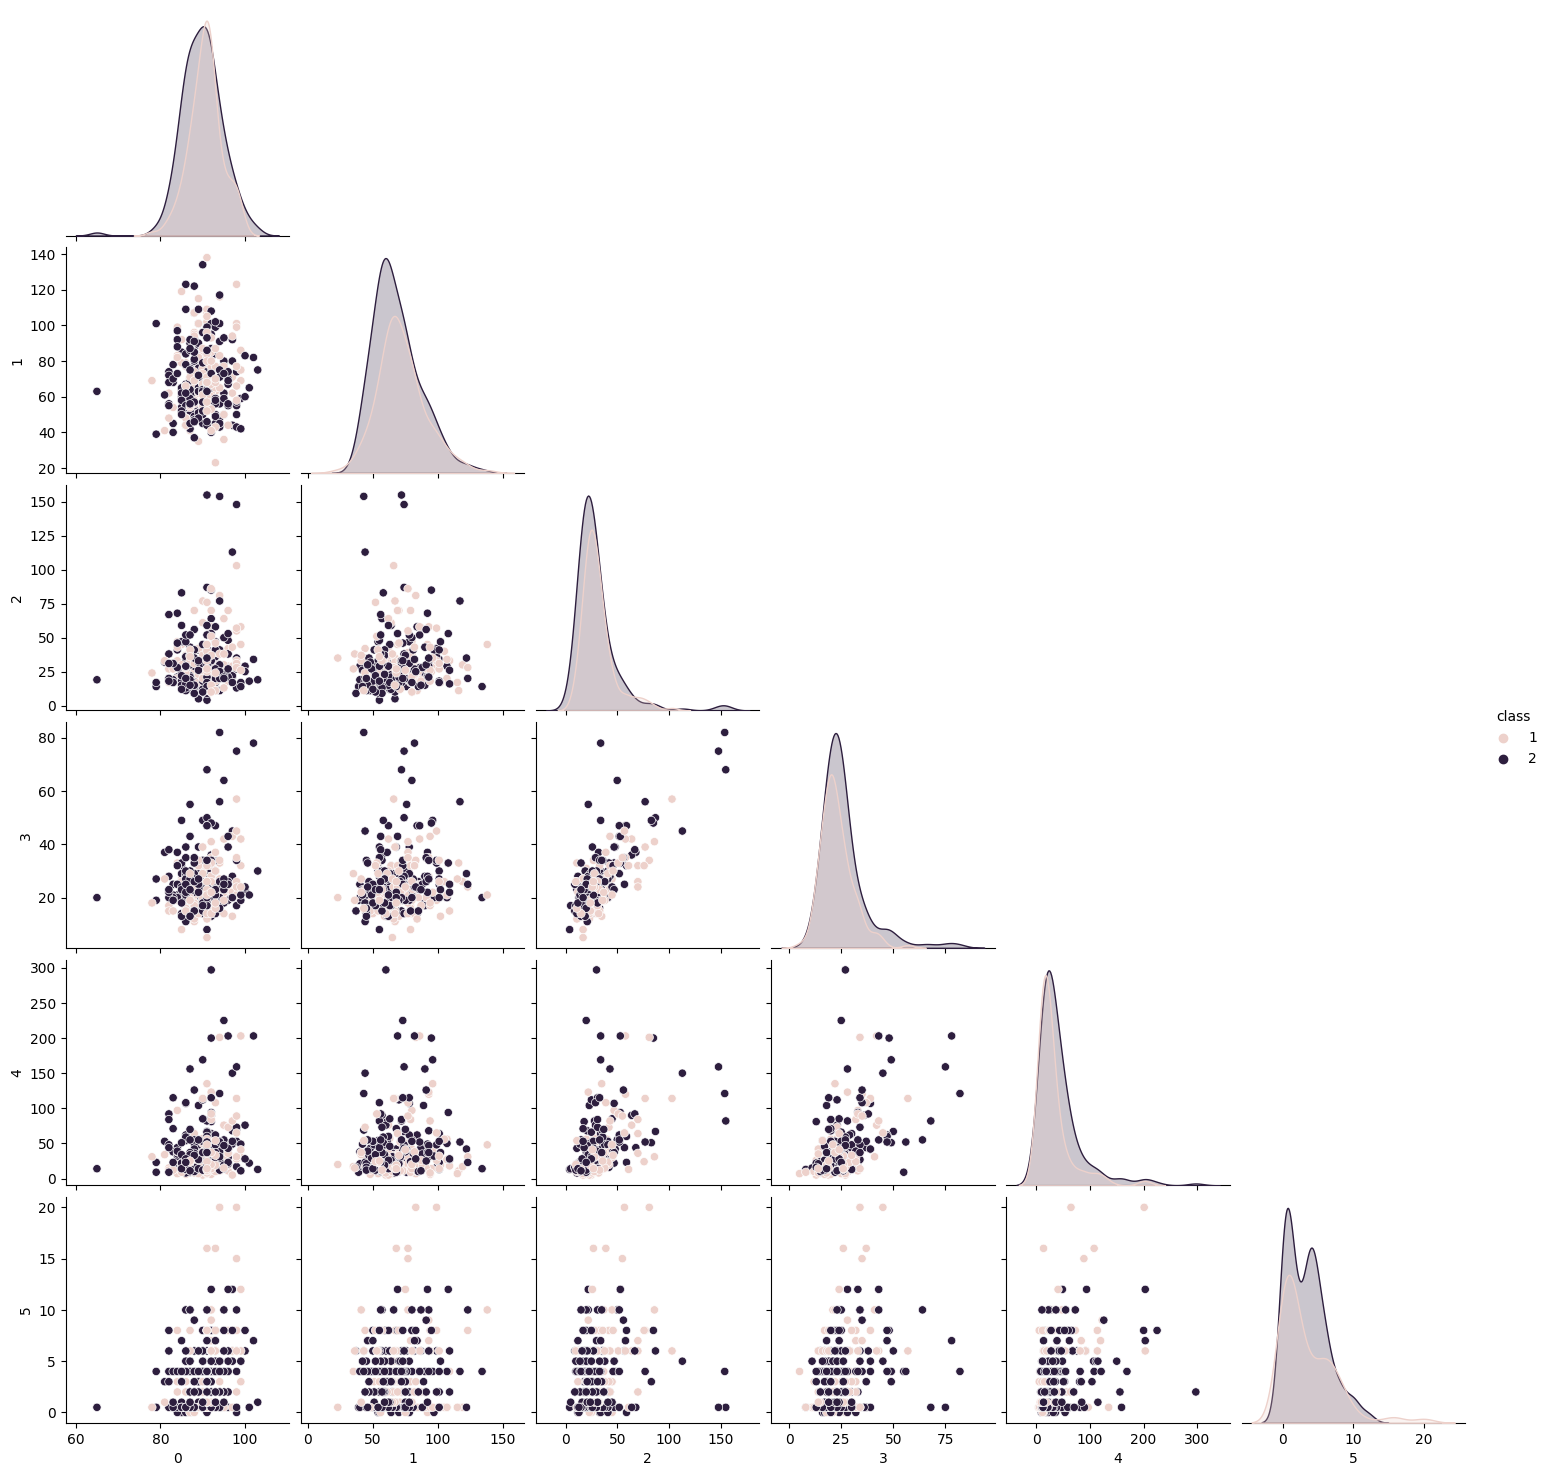

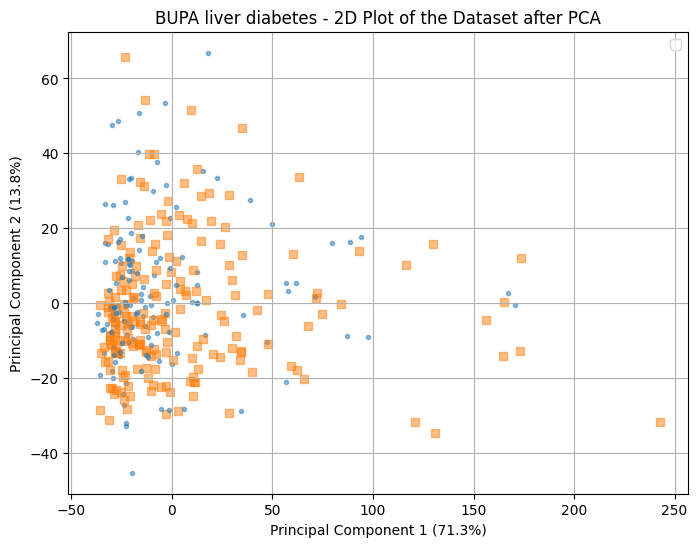

In [17]:

# fetch dataset
df = load_bupa()

X = pd.DataFrame(df.iloc[:, :-1])
y = pd.DataFrame(df.iloc[:, -1])

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
plotting(X, y, ds_name="BUPA liver diabetes", matrix_plot=True)
c = len(np.unique(numeric_labels))

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [3]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [15.827753590498364, 15.827754804277236, 15.827777141219586, 15.827798294624978, 15.827808125591222, 15.827837477707659, 15.827851332447466, 15.828034923322376, 15.828289858830077, 15.82831150410212]
ARI values: [-0.005045931333925038, -0.004261467991656107, -0.005045931333925038, -0.004686685611765168, -0.004261467991656107, -0.005045931333925038, -0.004261467991656107, -0.004686685611765168, -0.005045931333925038, -0.005045931333925038]
NS values: [0.894488874810735, 1.090756939441199, 0.8954573894206418, 1.090861573563663, 0.8957563158517826, 1.0911063484904386, 1.0900836026826262, 1.0901777928856453, 1.0927863580583101, 0.894516422820189]
NMI values: [0.0010090696204317913, 0.0003608888594625068, 0.0010090696204317913, 0.0006430988411763015, 0.0003608888594625068, 0.0010090696204317913, 0.0003608888594625068, 0.0006430988411763015, 0.0010090696204317913, 0.0010090696204317913]


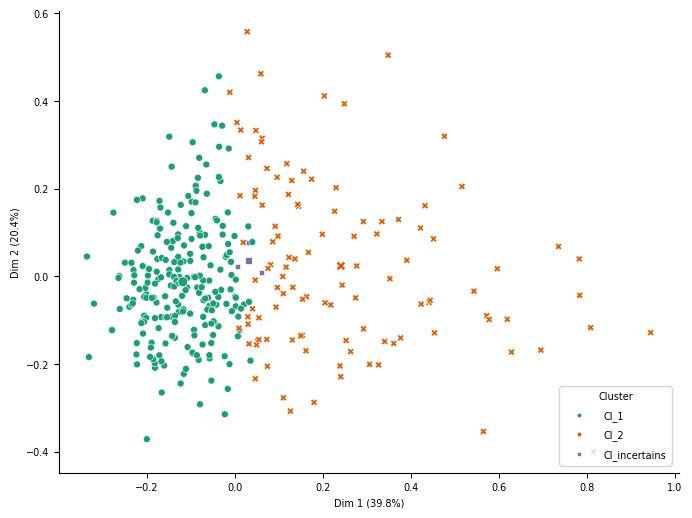

In [4]:
display_results_evidential(X, ecm_models, numeric_labels, up_low_appr=False)

## Weighted ECM (WECM)

In [5]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsilon=1e-6)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.28600320924429945, 0.2860033649710113, 0.28601081859503413, 0.28601588737034594, 0.28888779902602035, 0.2923434860897339, 0.292344994477253, 0.29234508570558126, 0.2923452931048317, 0.2923453866706389]
ARI values: [-0.008915841834116034, -0.008915841834116034, -0.008915841834116034, -0.008915841834116034, 0.004520651962775257, -0.0012642088004811156, -0.0012642088004811156, -0.0012642088004811156, -0.0012642088004811156, -0.0012642088004811156]
NS values: [1.2396977692985953, 0.8737619925211487, 0.870609557031988, 1.236507524804072, 0.9557567926373052, 1.4113148271861566, 1.6059026001898187, 1.6058305552375298, 1.410385753596494, 1.4104327957261729]
NMI values: [0.009711538743817055, 0.009711538743817055, 0.009711538743817055, 0.009711538743817055, 0.0017199442154629345, 2.2480258120631502e-05, 2.2480258120631502e-05, 2.2480258120631502e-05, 2.2480258120631502e-05, 2.2480258120631502e-05]


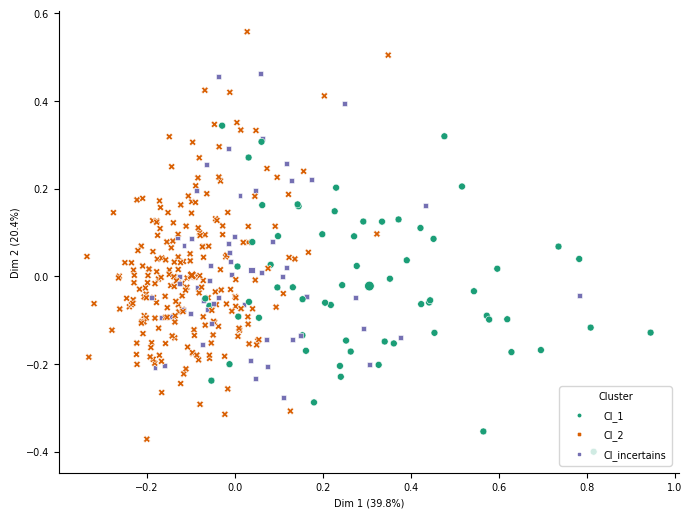

In [6]:
display_results_evidential(X, wecm_models, numeric_labels, up_low_appr=False)

# Weighted FCM - Keller et al. 2000

In [7]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="none")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.4012693614908732, 0.4012694007802643, 0.4012702439897118, 0.4012702923278046, 0.401270357910281, 0.4012704097402917, 0.40127042112253586, 0.4012704833243428, 0.401270591298003, 0.40127079685397604]
ARI values: [-0.010217397370038732, -0.010217397370038732, -0.010217397370038732, -0.010217397370038732, -0.010217397370038732, -0.010217397370038732, -0.010217397370038732, -0.010217397370038732, -0.010217397370038732, -0.010217397370038732]
NMI values: [0.005868441170609008, 0.005868441170609008, 0.005868441170609008, 0.005868441170609008, 0.005868441170609008, 0.005868441170609008, 0.005868441170609008, 0.005868441170609008, 0.005868441170609008, 0.005868441170609008]


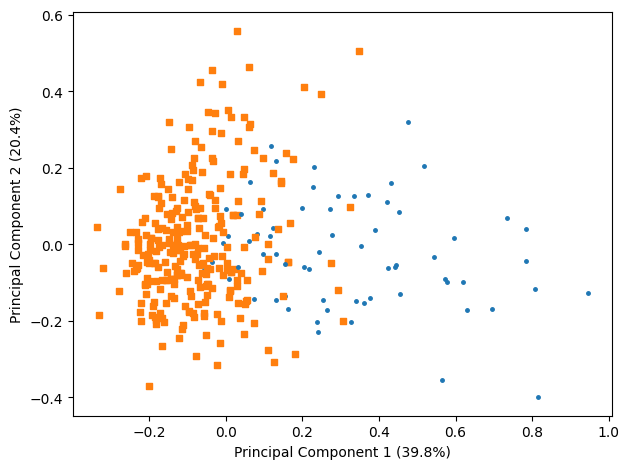

In [8]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [ ]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=2.6, verbose=True, init="None")
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [9]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, init="None", epsilon=1e-6)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [9.79144012498735, 9.79144050324232, 9.79144446523567, 9.791444538051586, 9.791444592292219, 9.791444624559084, 9.791444631682793, 9.791444707162105, 9.791444757083298, 9.791444765732823]
ARI values: [-0.006680514717868182, -0.006680514717868182, -0.006680514717868182, -0.006680514717868182, -0.006680514717868182, -0.006680514717868182, -0.006680514717868182, -0.006680514717868182, -0.006680514717868182, -0.006680514717868182]
NMI values: [0.002344674506194876, 0.002344674506194876, 0.002344674506194876, 0.002344674506194876, 0.002344674506194876, 0.002344674506194876, 0.002344674506194876, 0.002344674506194876, 0.002344674506194876, 0.002344674506194876]


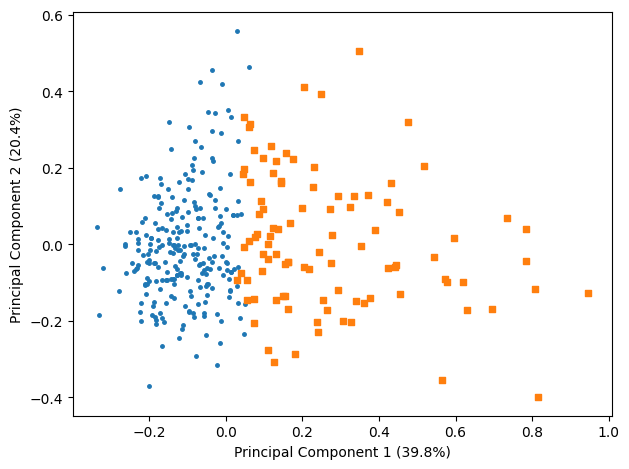

In [10]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [11]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None", epsilon=1e-6)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.42825668182209325, 0.4282567660337936, 0.42825678700114855, 0.4282569575892981, 0.4282569830408226, 0.42825701289747786, 0.42825708611025703, 0.4282571261879684, 0.4282571609833979, 0.4282572646842662]
ARI values: [-0.009523275378575434, -0.009523275378575434, -0.009523275378575434, -0.009523275378575434, -0.009523275378575434, -0.009523275378575434, -0.009523275378575434, -0.009523275378575434, -0.009523275378575434, -0.009523275378575434]
NMI values: [0.0037944297351951133, 0.0037944297351951133, 0.0037944297351951133, 0.0037944297351951133, 0.0037944297351951133, 0.0037944297351951133, 0.0037944297351951133, 0.0037944297351951133, 0.0037944297351951133, 0.0037944297351951133]


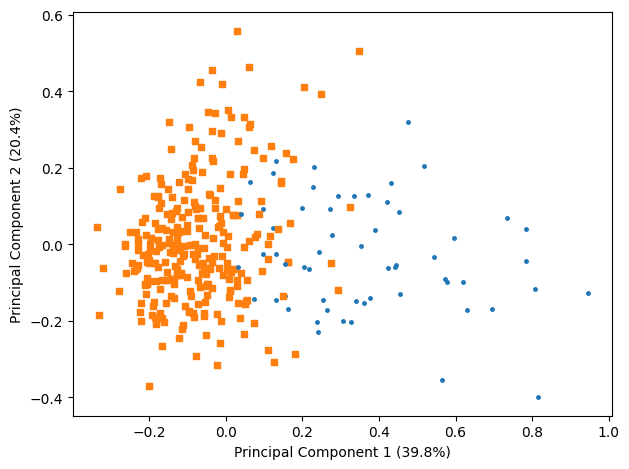

In [12]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [13]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None", epsilon=1e-6)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.5251168729350193, 0.5251170176159778, 0.5251172073253902, 0.5251172153238184, 0.5251172258755994, 0.5251172460466637, 0.5251172741534206, 0.5251172907487676, 0.5251173142880439, 0.525117343042371]
ARI values: [-0.007134422101838814, -0.007134422101838814, -0.007134422101838814, -0.007134422101838814, -0.007134422101838814, -0.007134422101838814, -0.007134422101838814, -0.007134422101838814, -0.007134422101838814, -0.007134422101838814]
NMI values: [0.0062074846643815325, 0.0062074846643815325, 0.0062074846643815325, 0.0062074846643815325, 0.0062074846643815325, 0.0062074846643815325, 0.0062074846643815325, 0.0062074846643815325, 0.0062074846643815325, 0.0062074846643815325]


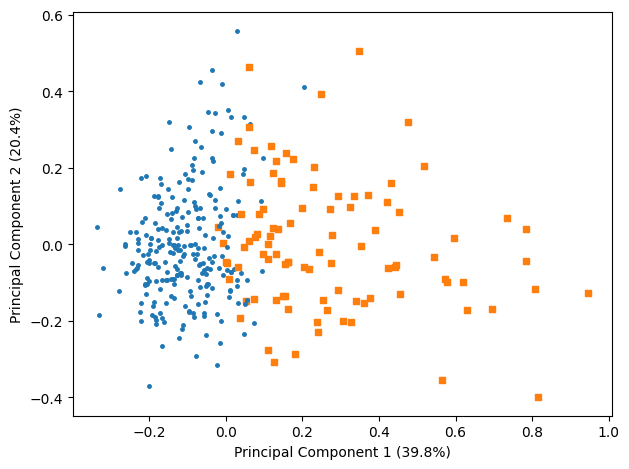

In [14]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [15]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [9.06970195223219, 9.069706859006873, 9.069707027852573, 9.06970715616347, 9.069707181992648, 9.069707241599666, 9.069707368933754, 9.069707419393865, 9.069707452313407, 9.06970745712849]
ARI values: [-0.006792739879910361, -0.006792739879910361, -0.006792739879910361, -0.006792739879910361, -0.006792739879910361, -0.006792739879910361, -0.006792739879910361, -0.006792739879910361, -0.006792739879910361, -0.006792739879910361]
NMI values: [0.0033301846443879336, 0.0033301846443879336, 0.0033301846443879336, 0.0033301846443879336, 0.0033301846443879336, 0.0033301846443879336, 0.0033301846443879336, 0.0033301846443879336, 0.0033301846443879336, 0.0033301846443879336]


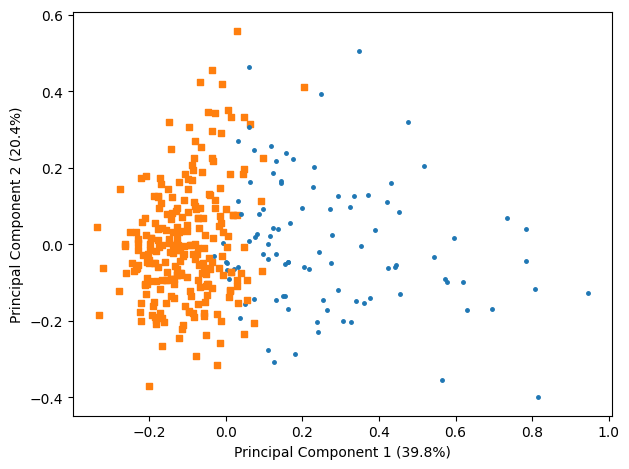

In [16]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)